In [3]:
import pylab as pl
import pandas as pd
import numpy as np
import json
import zipfile
import sys
import os
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from scipy.misc import factorial
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [4]:
def getCitiData(date):
    import requests
    import zipfile
    import StringIO
    zip_file_url = "https://s3.amazonaws.com/tripdata/" + date + "-citibike-tripdata.zip"
    r = requests.get(zip_file_url, stream=True)
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    z.extractall()

In [5]:
datelist = '201601'
getCitiData(datelist) 


In [6]:
#Include all the data into a list    
list1 = []
temp = pd.read_csv(datelist + "-citibike-tripdata.csv")
list1.append(temp)

In [7]:
df = pd.DataFrame()
for i in list1:
    df= df.append(i, ignore_index=True)



In [8]:
df.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [10]:
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [152]:
df = df.dropna(subset = ['birth year'])

In [153]:

bins = np.arange(10,100,1)
ageD = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero])
ageNorm = ageD/ageD.sum()


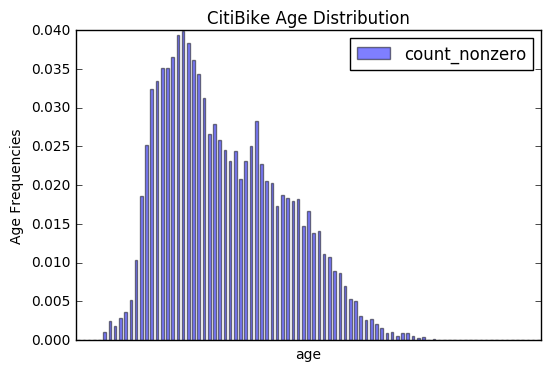

In [154]:
ageNorm.plot(kind = 'bar', alpha = 0.5)
pl.xticks([])
pl.ylabel('Age Frequencies')
pl.title('CitiBike Age Distribution')




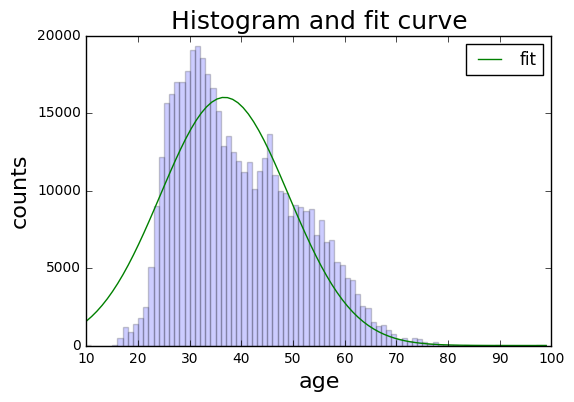

In [159]:
def gaussFunc(x, x0, sigma, a):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))


n,bins, patches = pl.hist(df.age,bins,alpha = 0.2)

x_lin = np.linspace(bins[0], bins[-1], np.size(n))
popt, pcov = curve_fit(gaussFunc, x_lin, n, p0 = [30, 1, 10])
y = gaussFunc(x_lin, *popt)  # 解压popt的参数
pl.xlabel('age', fontsize = 16)
pl.ylabel('counts', fontsize = 16)

pl.plot(x_lin, y, label = 'fit')
pl.legend(loc = "upper tight")
pl.title('Histogram and fit curve',fontsize = 18)

In [80]:
print 'mean = {} '.format(popt[0])
print 'deviation = {} '.format(popt[1])

mean = 36.7272596915 
deviation = 12.4077140425 


## First test: KS test

$H_0$: The age distribution is drawn from the same gaussian distribution.

$H_1$: The age distribution is not drawn from the same gaussian distribution.

The significant level a = 0.05

In [100]:
stats.kstest(df.age, "norm", args = (36.7272596915,12.4077140425  ))

KstestResult(statistic=0.10687781391651446, pvalue=0.0)

#### Since the p-value is so small, so the null hypothesis is rejected. 

## Anderson Darling test

$H_0$: The age distribution is drawn from the gaussian distribution.

$H_1$: The age distribution is different from the gaussian distribution.

The significant level a = 0.05


In [98]:
stats.anderson(df.age, 'norm')

AndersonResult(statistic=5693.0809600793873, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

#### Since the AndersonResult is so large so that the null hypothesis is rejected, that is the age distribution is different from the gaussian distribution.

## Poisson test


In [192]:
def poisson(k, lam,t):
     return t*(lam**k/factorial(k)*np.exp(-lam))

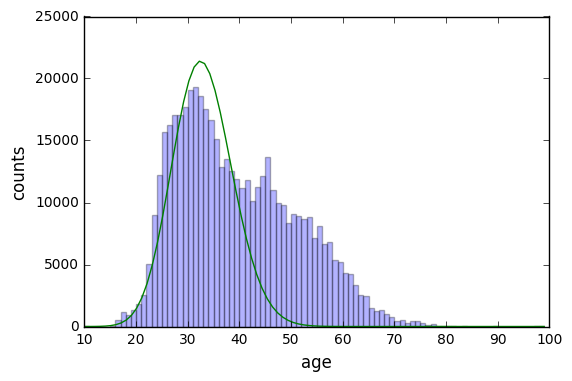

In [197]:
n, bins, patches = pl.hist(df.age, bins, alpha=0.3)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
popt, pcov = curve_fit(poisson, x_lin, n, p0= [5,20])
y = poisson(x_lin, *popt)
pl.plot(x_lin, y, label = 'fit')
pl.xlabel('age', fontsize = 12)
pl.ylabel('counts', fontsize = 12)

In [215]:
stats.kstest(df.age, "poisson", args=(popt[0],popt[0]))

KstestResult(statistic=0.86888438185198036, pvalue=0.0)

#### Since the ks-value is so large so that the null hypothesis is rejected, that is the age distribution is different from the poisson distribution.

In [223]:
test = np.random.poisson(popt[0],np.size(df.age))
stats.chisquare(df.age,test)


Power_divergenceResult(statistic=3338806.6281044292, pvalue=0.0)

#### Since the p-value is so small so that the null hypothesis is rejected, that is the age distribution is different from the poisson distribution.

## Extra Credit





In [9]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [13]:
df1 = df[['start station latitude','start station longitude','age']]

In [14]:
df1.head()

,start station latitude,start station longitude,age
0,40.719105,-73.999733,57.0
1,40.743943,-73.979661,46.0
2,40.750664,-74.001768,33.0
3,40.719105,-73.999733,54.0
4,40.765909,-73.976342,63.0


In [ ]:
#Latitude and Longitude